In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
por = pd.read_csv('student-por.csv', sep=';')
mat = pd.read_csv('student-mat.csv', sep=';')
por_mat = pd.concat([por, mat], axis=0, ignore_index=True)

In [6]:
por_mat = por_mat.drop(columns=['G1', 'G2'])
por_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [7]:
por_mat.shape

(1044, 31)

In [57]:
por_mat.info()
por_mat.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         1044 non-null   int64 
 1   Medu        1044 non-null   int64 
 2   Fedu        1044 non-null   int64 
 3   Mjob        1044 non-null   object
 4   Fjob        1044 non-null   object
 5   reason      1044 non-null   object
 6   guardian    1044 non-null   object
 7   traveltime  1044 non-null   int64 
 8   studytime   1044 non-null   int64 
 9   failures    1044 non-null   int64 
 10  famrel      1044 non-null   int64 
 11  freetime    1044 non-null   int64 
 12  goout       1044 non-null   int64 
 13  Dalc        1044 non-null   int64 
 14  Walc        1044 non-null   int64 
 15  health      1044 non-null   int64 
 16  absences    1044 non-null   int64 
 17  G3          1044 non-null   int64 
 18  schoolsup   1044 non-null   int64 
 19  famsup      1044 non-null   int64 
 20  paid    

age            8
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G3            19
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
school         2
sex            2
address        2
famsize        2
Pstatus        2
dtype: int64

In [28]:
por_mat.iloc[0]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            4
G3                 11
Name: 0, dtype: object

Two datasets containing data on two subjects (mathematics and Portuguese) were combined and grades contained in the dataset for the first and second 
periods were droppped because they had a strong correlation with the target attribute and were also not suitable for the study.

<Axes: >

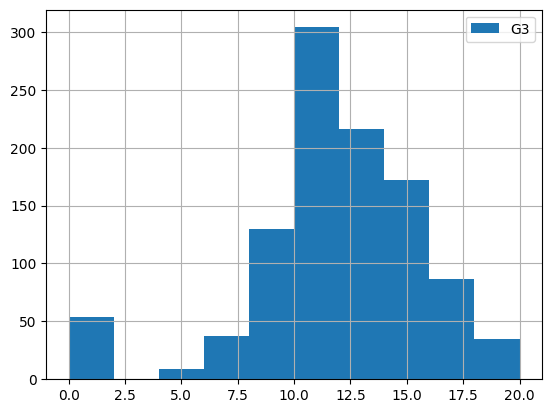

In [23]:
por_mat.G3.hist()

<Axes: >

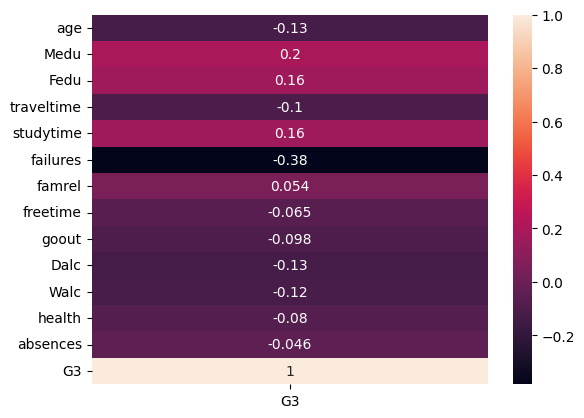

In [42]:
corr = por_mat.corr(numeric_only=True)
sns.heatmap(corr[['G3']], annot=True)

freetime
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
Name: G3, dtype: object

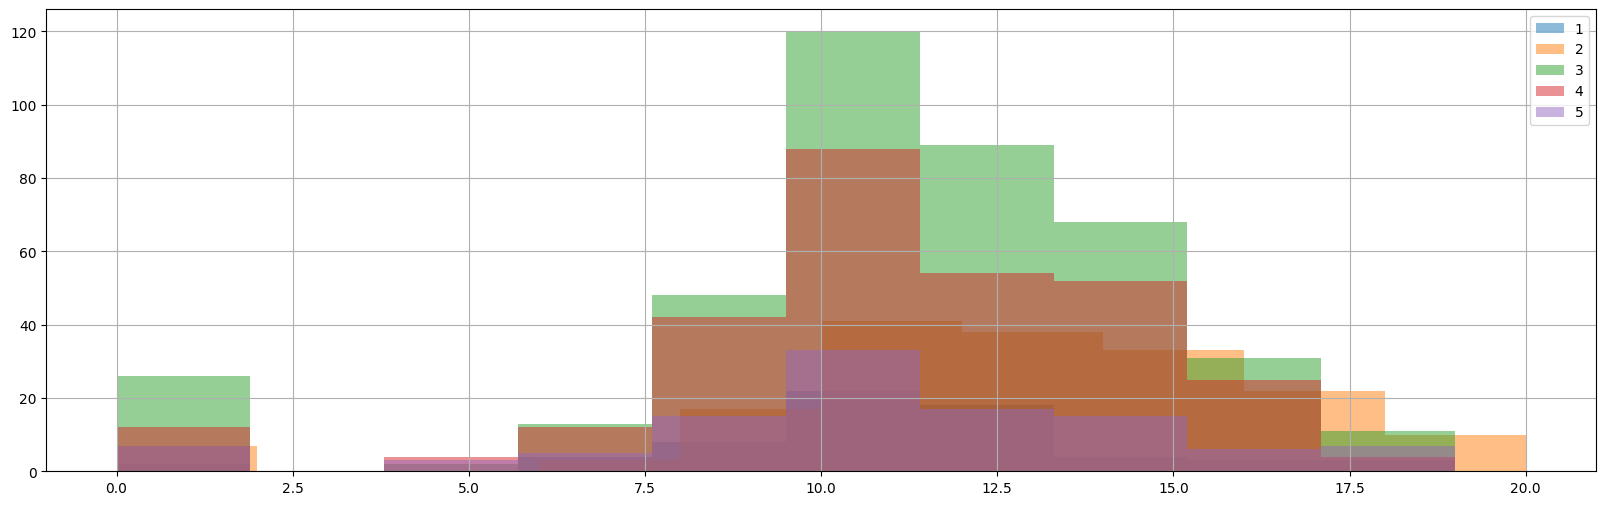

In [41]:
plt.figure(figsize=(20, 6))
por_mat.groupby('freetime').G3.hist(alpha=0.5, legend=True)

studytime
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
Name: G3, dtype: object

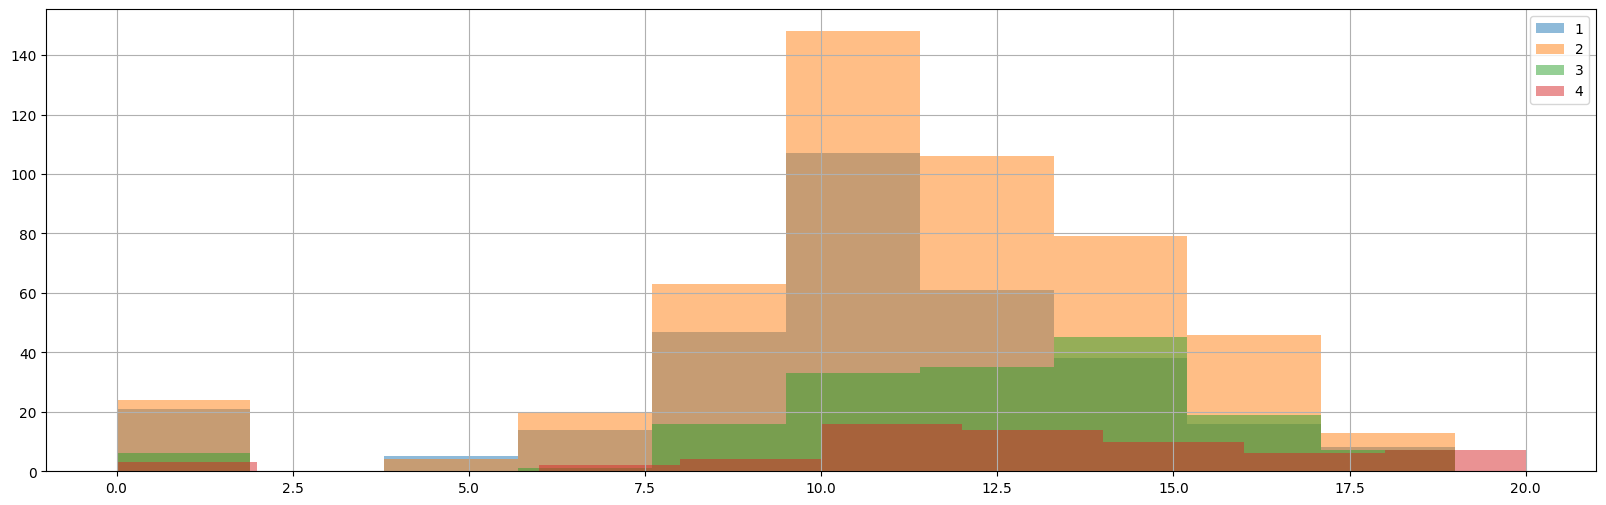

In [32]:
plt.figure(figsize=(20, 6))
por_mat.groupby('studytime').G3.hist(alpha=0.5, legend=True)

<Axes: xlabel='higher', ylabel='G3'>

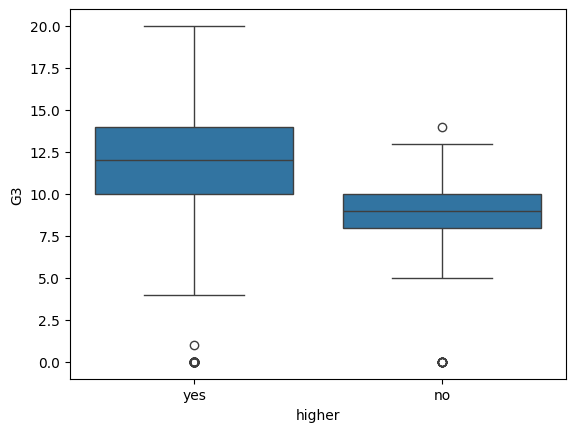

In [37]:
sns.boxplot(x='higher', y='G3', data=por_mat)

<Axes: xlabel='Fjob', ylabel='G3'>

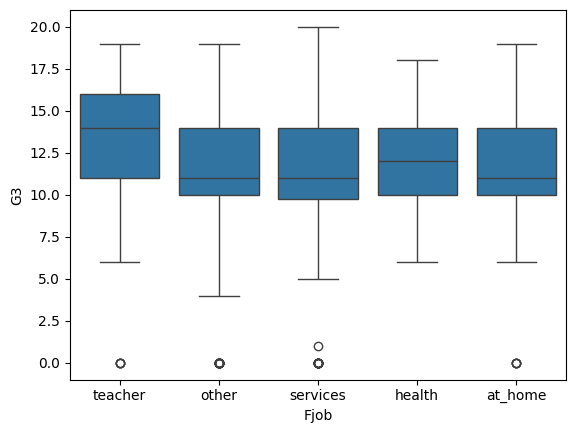

In [38]:
sns.boxplot(x='Fjob', y='G3', data=por_mat)

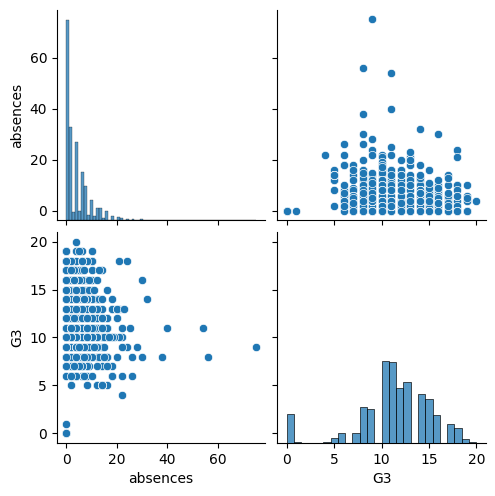

In [40]:
sns.pairplot(por_mat[['absences', 'G3']])

From the histogram of the target variable, we can observe a group of students with a grade of 0, which may significantly complicate the regression task: while the average grade is around 10-12, the zeros stand out from the general distribution. When analyzing other features, it is difficult to clearly identify factors that directly influence the final grade. Interestingly, even in cases where a linear relationship might be expected (for example, the number of missed classes), such a dependency is not observed. Based on these observations, it can be assumed that linear models are unlikely to perform well. The regression task is further complicated by the non-normal distribution of the target variable, which suggests that reframing the problem as a classification task may potentially yield better results.

In [ ]:
# Сategorical features are coded by one-hot encoding

In [44]:
por_mat = pd.get_dummies(por_mat, columns=['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], dtype=int)
por_mat = por_mat.drop(columns=['schoolsup_no', 'famsup_no', 'paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_no'])
por_mat = por_mat.rename(columns={'schoolsup_yes': 'schoolsup', 'famsup_yes': 'famsup', 'paid_yes': 'paid', 'activities_yes': 'activities', 'nursery_yes': 'nursery', 'higher_yes': 'higher', 'internet_yes': 'internet', 'romantic_yes': 'romantic'})
por_mat = pd.get_dummies(por_mat, columns=['school', 'sex', 'address', 'famsize', 'Pstatus'], dtype=int)
por_mat = por_mat.drop(columns=['school_MS', 'sex_F', 'address_R', 'famsize_LE3', 'Pstatus_A'])
por_mat = por_mat.rename(columns={'school_GP': 'school', 'sex_M': 'sex', 'address_U': 'address', 'famsize_GT3': 'famsize', 'Pstatus_T': 'Pstatus'})

In [59]:
por_mat = pd.get_dummies(por_mat, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True, dtype=int)

In [60]:
X = por_mat.drop('G3', axis=1)
y_reg = por_mat.G3

In [61]:
X.shape

(1044, 39)

In [62]:
y_reg.head() # for regression we leave the target value from 0 to 20

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [63]:
y_clas = pd.cut(por_mat['G3'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'], right=True, include_lowest=True)
y_clas.head() # for classification we divide the target value into intervals 0-5, 6-10, 11-15, 16-20

0    11-15
1    11-15
2    11-15
3    11-15
4    11-15
Name: G3, dtype: category
Categories (4, object): ['0-5' < '6-10' < '11-15' < '16-20']

In [67]:
X.to_csv('X_por_mat.csv', index=False)
y_reg.to_csv('y_reg.csv', index=False)
y_clas.to_csv('y_clas.csv', index=False)